In this Personal Project, I analyze the data and perform a K Nearest Neighbor Machine Learning Algorithm. The values are not defined and the columns are classified. Regardless, I go through the basic steps of data analytics, visualization, and machine learning. 

1. Read in the dataset and receive general descriptions
2. View the dataset using the pandas library
3. Performed a train test split on the data set
4. Sucessfully outputted predictions for X_test or 'TARGET CLASS'
5. Printed out Confusion Matrix and Classification Reports for dataset
6. Optimized the performance of the model to find the best k value for a low error rate, while also keeping the k value low.

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

Imports

In [2]:
df = pd.read_csv('Classified Data',index_col=0)

In [3]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


Read in data and conduct K nearest neighbors algorithm in next step. 

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [18]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

standardizes every column with the data we need to the same scale

In [16]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))

In [22]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])

In [23]:
df_feat.head() #head of our standardized data

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [52]:
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

1. Use sklearn preprocessing to import Standard Scaler
2. Create scaler object
3. Fit the features
4. Scaler.transfor to scale the features exclusing the Target class which is what we are trying to predict 
5. Use the pandas library in order to create a data frame with the scaled features

Data is now ready to be put through a machine learning algorithm

In [25]:
from sklearn.model_selection import train_test_split

In [30]:
X = df_feat
y = df['TARGET CLASS']
#train and split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn = KNeighborsClassifier(n_neighbors=1) #k=1

In [34]:
knn.fit(X_train,y_train) #fit method for training data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [37]:
pred = knn.predict(X_test)

In [53]:
pred #predictions based on anonmaliyzed features 

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0])

1. Performed train test split on the scaled features
2. Set the variables// set the target class equal to y
3. Import KNeighborsClassifer
4. Started with Low kvalue = 1
5. Examined the confusion matrix and classfication report for the model



In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[151   8]
 [ 15 126]]
             precision    recall  f1-score   support

          0       0.91      0.95      0.93       159
          1       0.94      0.89      0.92       141

avg / total       0.92      0.92      0.92       300



In [41]:
#model seems fairly accurate in 90percentiles with only 1 kvalue

In [42]:
#elbow method to choose better k value

In [44]:
error_rate = []

for i in range(1,40):     #i represents k, check all k values from 1 to 40
    
    knn = KNeighborsClassifier(n_neighbors=i) 
    knn.fit(X_train,y_train)  #fit that model to training set
    pred_i = knn.predict(X_test)  #variabel pred_i is equal to the KNN predictions from our training data which the variable is used in the next line
    error_rate.append(np.mean(pred_i != y_test)) #average of where my predictions were not equal to the actual test values

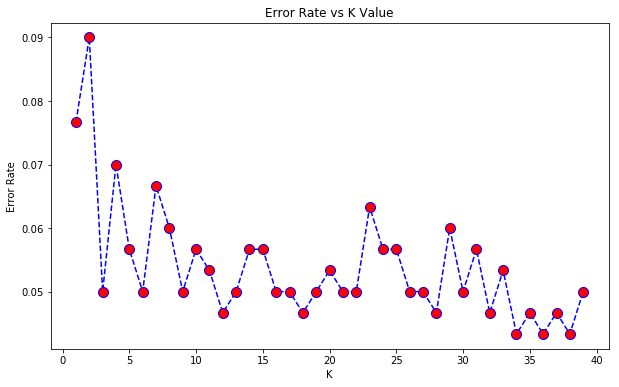

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


Based on this figure, we start with a high error rate with a lower k value. As we go along up and down we begin to lower our error rate. Minimum is approximately at the 20 K value mark. K =34,35 for another low minimum. We should as a result pick a higher k value for a lower error rate. 17 is probably the best choice so that we can minimize the amount of k values. k value = 17 is approx .05 error rate.

In [50]:
knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[153   6]
 [  9 132]]


             precision    recall  f1-score   support

          0       0.94      0.96      0.95       159
          1       0.96      0.94      0.95       141

avg / total       0.95      0.95      0.95       300



I was able to classify a couple more points correctly 95% and imporved precision and recall. I optimized the performance of the model by raising the k value. We found the optimal k value by conducting the error_rate loop above.